In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv(r'C:\Users\gabri\Desktop\projeto.csv', sep = ';')
df = df.rename(columns={'Número_de_Suícidios': 'Número de Homicídios'})

In [36]:
df

,País,Região,Sub_Região,Rate,Número de Homicídios,Ano
0,Mianmar,Ásia,Sudeste Asiático,28.4,15299,2021
1,Albânia,Europa,Sul da Europa,2.1,61,2020
2,Argélia,África,Norte da África,1.3,580,2020
3,Andorra,Europa,Sul da Europa,2.6,2,2020
4,Antígua e Barbuda,Américas,Caribe,9.2,9,2020
...,...,...,...,...,...,...
187,Santa Helena,África,África Ocidental,0.0,0,2009
188,São Pedro e Miquelon,Américas,América do Norte,15.8,1,2009
189,Sudão,África,Norte da África,5.1,1702,2008
190,Ilhas Virgens Britânicas,Américas,Caribe,8.3,2,2006


In [37]:
df.shape

(192, 6)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   País                  192 non-null    object 
 1   Região                192 non-null    object 
 2   Sub_Região            192 non-null    object 
 3   Rate                  192 non-null    float64
 4   Número de Homicídios  192 non-null    int64  
 5   Ano                   192 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.1+ KB


In [39]:
df.isnull().sum()

País                    0
Região                  0
Sub_Região              0
Rate                    0
Número de Homicídios    0
Ano                     0
dtype: int64

In [40]:
df.describe()

,Rate,Número de Homicídios,Ano
count,192.000000,192.000000,192.000000
mean,6.826563,1972.911458,2017.552083
std,9.624748,6600.122245,3.451594
min,0.000000,0.000000,2006.000000
25%,1.100000,33.250000,2016.000000
50%,2.600000,132.500000,2019.000000
75%,7.825000,792.500000,2020.000000
max,49.300000,47722.000000,2021.000000


In [42]:
lista = ['Rate', 'Número de Homicídios', 'Ano']
for a in lista:
    print(a)
    df[a] = df[a].astype(int)

Rate
Número de Homicídios
Ano


In [43]:
df

,País,Região,Sub_Região,Rate,Número de Homicídios,Ano
0,Mianmar,Ásia,Sudeste Asiático,28,15299,2021
1,Albânia,Europa,Sul da Europa,2,61,2020
2,Argélia,África,Norte da África,1,580,2020
3,Andorra,Europa,Sul da Europa,2,2,2020
4,Antígua e Barbuda,Américas,Caribe,9,9,2020
...,...,...,...,...,...,...
187,Santa Helena,África,África Ocidental,0,0,2009
188,São Pedro e Miquelon,Américas,América do Norte,15,1,2009
189,Sudão,África,Norte da África,5,1702,2008
190,Ilhas Virgens Britânicas,Américas,Caribe,8,2,2006


In [44]:
df1 = df.sort_values('Número de Homicídios', ascending=False).head(5)
df1

,País,Região,Sub_Região,Rate,Número de Homicídios,Ano
15,Brasil,Américas,América do Sul,22,47722,2020
105,Nigéria,África,África Ocidental,22,44200,2019
41,Índia,Ásia,Sul da Ásia,3,40651,2020
58,México,Américas,América Central,28,36579,2020
93,Estados Unidos,Américas,América do Norte,6,21570,2020


In [45]:
df1 = df[['País','Número de Homicídios']].sort_values(by  = 'Número de Homicídios', ascending = False).head(5)
df1['Porcentagem'] = (df1['Número de Homicídios'] * 100 / df1['Número de Homicídios'].sum()).round(2)
df1

,País,Número de Homicídios,Porcentagem
15,Brasil,47722,25.02
105,Nigéria,44200,23.18
41,Índia,40651,21.31
58,México,36579,19.18
93,Estados Unidos,21570,11.31


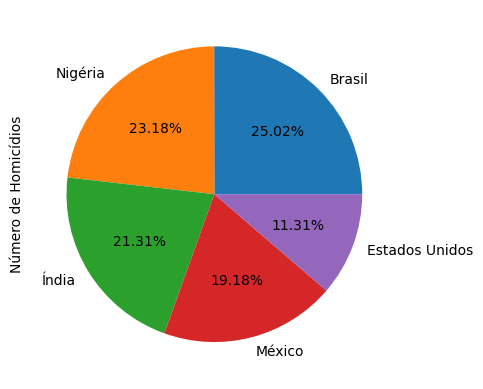

In [46]:
df1.plot(x = 'País', y = 'Número de Homicídios', kind = 'pie', labels = df1.País, autopct = '%1.2f%%' )
plt.legend().set_visible(False)

In [47]:
df2 = df.groupby('Região')['Número de Homicídios'].sum().sort_values(ascending=False)
df2

Região
Américas    153571
Ásia        105552
África       99460
Europa       19869
Oceânia        347
Name: Número de Homicídios, dtype: int32

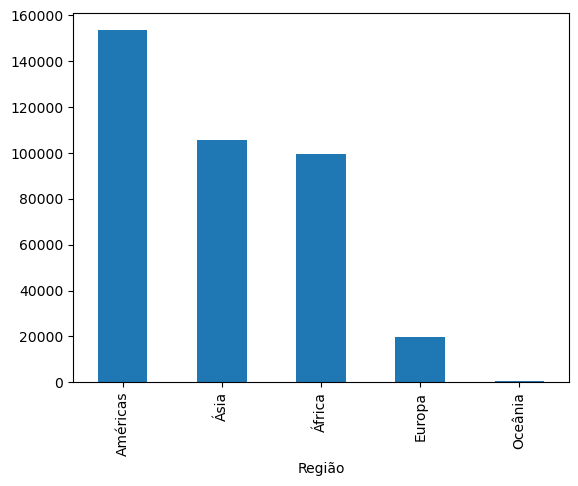

In [48]:
df2.plot(kind = 'bar')
plt.show()

In [49]:
df3 = df.groupby('Sub_Região')['Número de Homicídios'].sum().sort_values(ascending = False)
df3

Sub_Região
América do Sul              78872
Sul da Ásia                 58631
América Central             47371
África Ocidental            46318
Sudeste Asiático            25314
África Oriental             23654
América do Norte            22317
África do Sul               21479
Europa Oriental             14604
Ásia Ocidental              11638
Ásia Oriental                8563
Norte da África              5538
Caribe                       5011
África Central               2471
Norte da Europa              2097
Europa Ocidental             2075
Ásia Central                 1406
Sul da Europa                1093
Austrália, Nova Zelândia      347
Name: Número de Homicídios, dtype: int32

In [50]:
df3.index

Index(['América do Sul', 'Sul da Ásia', 'América Central', 'África Ocidental',
       'Sudeste Asiático', 'África Oriental', 'América do Norte',
       'África do Sul', 'Europa Oriental', 'Ásia Ocidental', 'Ásia Oriental',
       'Norte da África', 'Caribe', 'África Central', 'Norte da Europa',
       'Europa Ocidental', 'Ásia Central', 'Sul da Europa',
       'Austrália, Nova Zelândia'],
      dtype='object', name='Sub_Região')

In [28]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23654, 22317, 21479, 14604,
       11638,  8563,  5538,  5011,  2471,  2097,  2075,  1406,  1093,
         347])

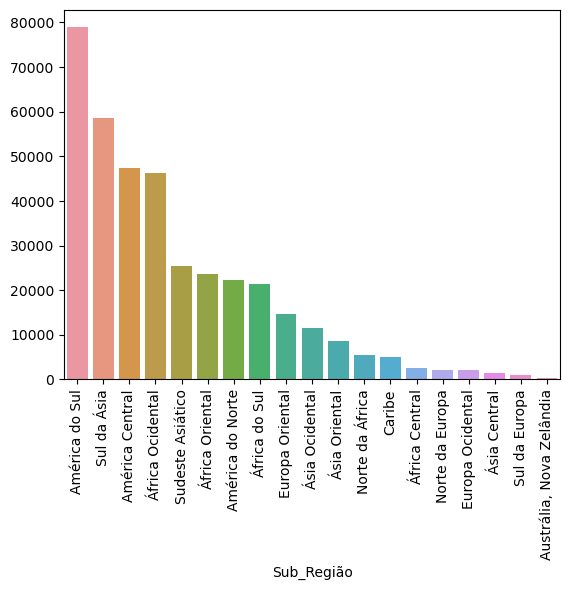

In [29]:
sns.barplot(x= df3.index, y = df3.values)
plt.xticks(rotation = 90)
xlabel = None

In [51]:
df

,País,Região,Sub_Região,Rate,Número de Homicídios,Ano
0,Mianmar,Ásia,Sudeste Asiático,28,15299,2021
1,Albânia,Europa,Sul da Europa,2,61,2020
2,Argélia,África,Norte da África,1,580,2020
3,Andorra,Europa,Sul da Europa,2,2,2020
4,Antígua e Barbuda,Américas,Caribe,9,9,2020
...,...,...,...,...,...,...
187,Santa Helena,África,África Ocidental,0,0,2009
188,São Pedro e Miquelon,Américas,América do Norte,15,1,2009
189,Sudão,África,Norte da África,5,1702,2008
190,Ilhas Virgens Britânicas,Américas,Caribe,8,2,2006


In [52]:
df[df['Região'].isin(['Ásia', 'Europa'])]

,País,Região,Sub_Região,Rate,Número de Homicídios,Ano
0,Mianmar,Ásia,Sudeste Asiático,28,15299,2021
1,Albânia,Europa,Sul da Europa,2,61,2020
3,Andorra,Europa,Sul da Europa,2,2,2020
6,Armênia,Ásia,Ásia Ocidental,1,52,2020
8,Áustria,Europa,Europa Ocidental,0,65,2020
...,...,...,...,...,...,...
179,São Marino,Europa,Sul da Europa,0,0,2011
180,Vietnã,Ásia,Sudeste Asiático,1,1358,2011
182,Ilhas do Canal,Europa,Norte da Europa,0,0,2010
183,Gibraltar,Europa,Sul da Europa,3,1,2010


In [54]:
df4 = df[(df['Região'] == 'Ásia') | (df['Região'] == 'Europa')]
df4 = df4[df4['Ano'] > 2016][['Região', 'Ano', 'Número de Homicídios']]
df4

,Região,Ano,Número de Homicídios
0,Ásia,2021,15299
1,Europa,2020,61
3,Europa,2020,2
6,Ásia,2020,52
8,Europa,2020,65
...,...,...,...
126,Europa,2018,755
128,Europa,2017,193
132,Europa,2017,726
136,Ásia,2017,1787


In [55]:
df4 = df4.groupby(['Região','Ano']).sum()['Número de Homicídios']
df4

Região  Ano 
Europa  2017     3670
        2018      883
        2019      249
        2020    15066
Ásia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Name: Número de Homicídios, dtype: int32

In [57]:
df_visual = df4.unstack(level = 0)
df_visual

Região,Europa,Ásia
Ano,,
2017,3670.0,1787.0
2018,883.0,16923.0
2019,249.0,6458.0
2020,15066.0,53516.0
2021,NaN,15299.0


In [69]:
df_visual.index = df_visual.index.astype(int).astype(str)

Text(0.5, 1.0, 'Número de Homicidios na Europa e Ásia (2017 - 2019)')

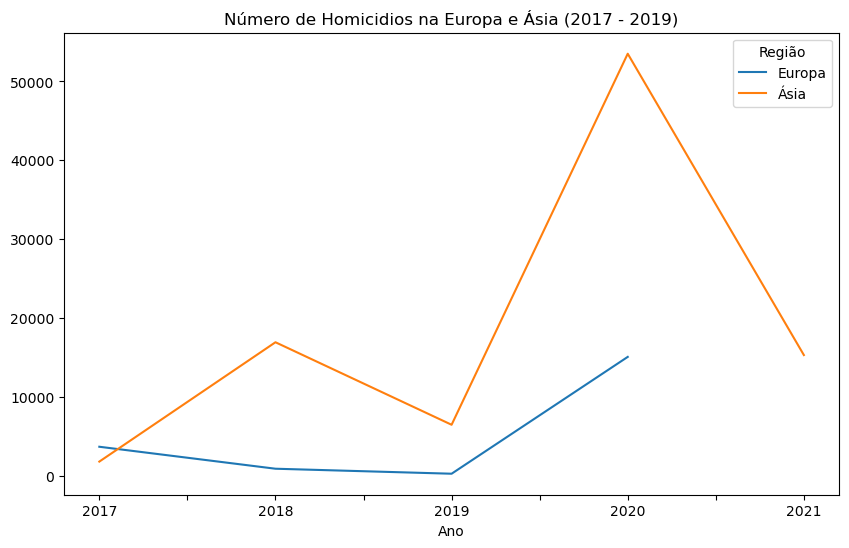

In [71]:
df_visual.plot(kind = 'line', figsize = (10,6))
plt.xlabel = 'Ano'
plt.ylabel = 'Número de Homicídios'
plt.title('Número de Homicidios na Europa e Ásia (2017 - 2019)')

In [72]:
df

,País,Região,Sub_Região,Rate,Número de Homicídios,Ano
0,Mianmar,Ásia,Sudeste Asiático,28,15299,2021
1,Albânia,Europa,Sul da Europa,2,61,2020
2,Argélia,África,Norte da África,1,580,2020
3,Andorra,Europa,Sul da Europa,2,2,2020
4,Antígua e Barbuda,Américas,Caribe,9,9,2020
...,...,...,...,...,...,...
187,Santa Helena,África,África Ocidental,0,0,2009
188,São Pedro e Miquelon,Américas,América do Norte,15,1,2009
189,Sudão,África,Norte da África,5,1702,2008
190,Ilhas Virgens Britânicas,Américas,Caribe,8,2,2006


In [75]:
df5 = df.groupby(['Ano'])['Rate'].sum().sort_values(ascending = False)
df5

Ano
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     35
2021     28
2017     27
2013     20
2010     18
2006     12
2008      5
2011      5
Name: Rate, dtype: int32

Text(0.5, 1.0, 'Taxa de Homicidio através dos anos')

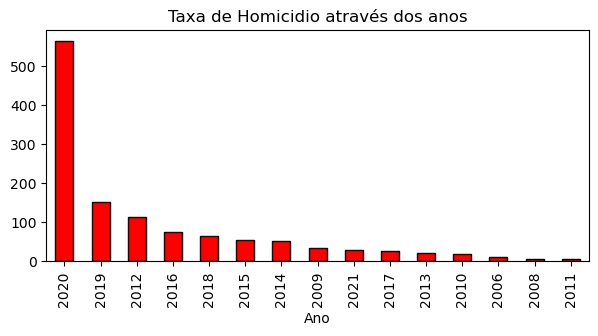

In [78]:
df5.plot(kind = 'bar', figsize = (7,3), color = 'red', edgecolor = 'black')
plt.title('Taxa de Homicidio através dos anos')

In [104]:
df6 = df[['Ano','Região', 'Número de Homicídios']]
df6 = df6.groupby(['Ano', 'Região']).sum().sort_values(by= 'Ano', ascending = False)
df6

Número de Homicídios
Ano  Região                        
2021 Ásia                     15299
2020 Ásia                     53516
     África                   28460
     Oceânia                    221
     Europa                   15066
     Américas                134784
2019 Europa                     249
     Américas                  4276
     Oceânia                    126
     África                   44210
     Ásia                      6458
2018 Ásia                     16923
     Europa                     883
     Américas                 13793
2017 Ásia                      1787
     África                    1467
     Europa                    3670
2016 África                    4987
     Ásia                       627
     Europa                       0
     Américas                   608
2015 Ásia                       241
     África                    2206
     Europa                       0
2014 Ásia                      3029
     Américas                    13
2013 Ásia                      5782
2012 Américas                    53
     África                   15264
     Ásia                        61
2011 Ásia                      1626
     África                     849
     Europa                       0
2010 África                     303
     Europa                       1
2009 África                      12
     Américas                    42
2008 África                    1702
2006 Ásia                       203
     Américas                     2

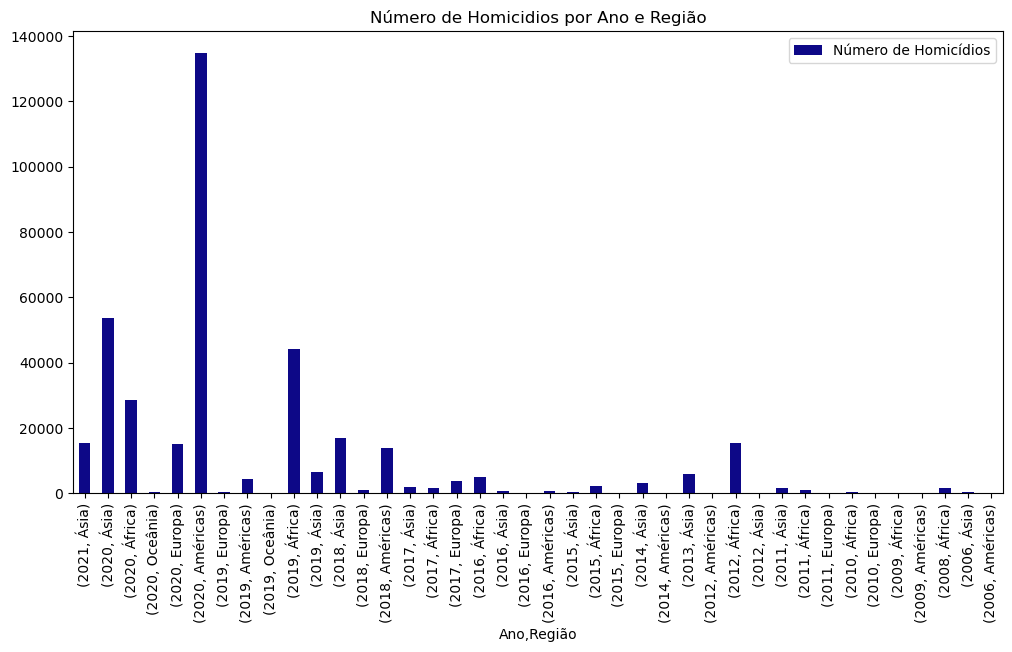

In [113]:
df6.plot(kind = 'bar', figsize= (12,6), colormap = 'plasma')
plt.xlabel = 'Ano'
plt.ylabel = 'Número de Homicídios'
plt.title('Número de Homicidios por Ano e Região')
plt.show()

In [118]:
df7 = df.groupby('Sub_Região')['Número de Homicídios'].mean().sort_values(ascending = False).round(2)
df7

Sub_Região
Sul da Ásia                 6514.56
América do Sul              6067.08
América Central             5921.38
América do Norte            4463.40
África do Sul               4295.80
África Ocidental            4210.73
Sudeste Asiático            2531.40
África Oriental             1689.57
Europa Oriental             1460.40
Ásia Oriental               1223.29
Norte da África             1107.60
África Central               823.67
Ásia Ocidental               581.90
Ásia Central                 281.20
Europa Ocidental             230.56
Caribe                       208.79
Austrália, Nova Zelândia     173.50
Norte da Europa              139.80
Sul da Europa                 64.29
Name: Número de Homicídios, dtype: float64

In [119]:
df7.index

Index(['Sul da Ásia', 'América do Sul', 'América Central', 'América do Norte',
       'África do Sul', 'África Ocidental', 'Sudeste Asiático',
       'África Oriental', 'Europa Oriental', 'Ásia Oriental',
       'Norte da África', 'África Central', 'Ásia Ocidental', 'Ásia Central',
       'Europa Ocidental', 'Caribe', 'Austrália, Nova Zelândia',
       'Norte da Europa', 'Sul da Europa'],
      dtype='object', name='Sub_Região')

In [120]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1689.57, 1460.4 , 1223.29, 1107.6 ,  823.67,  581.9 ,  281.2 ,
        230.56,  208.79,  173.5 ,  139.8 ,   64.29])

In [123]:
data = {
    
    'Categoria': df7.index,
    'Valores': df7.values,
    'Info': df7.values
}
df = pd.DataFrame(data)
df

,Categoria,Valores,Info
0,Sul da Ásia,6514.56,6514.56
1,América do Sul,6067.08,6067.08
2,América Central,5921.38,5921.38
3,América do Norte,4463.40,4463.40
4,África do Sul,4295.80,4295.80
5,África Ocidental,4210.73,4210.73
6,Sudeste Asiático,2531.40,2531.40
7,África Oriental,1689.57,1689.57
8,Europa Oriental,1460.40,1460.40
9,Ásia Oriental,1223.29,1223.29


In [126]:
import plotly.express as px

In [131]:
fig = px.treemap(df, path = ['Categoria'], values = 'Valores', title = 'Treemap')
fig.update_traces(hovertemplate = 'Category: %{label}<br>Value:%{value}')
fig.show()

In [ ]:
df.to